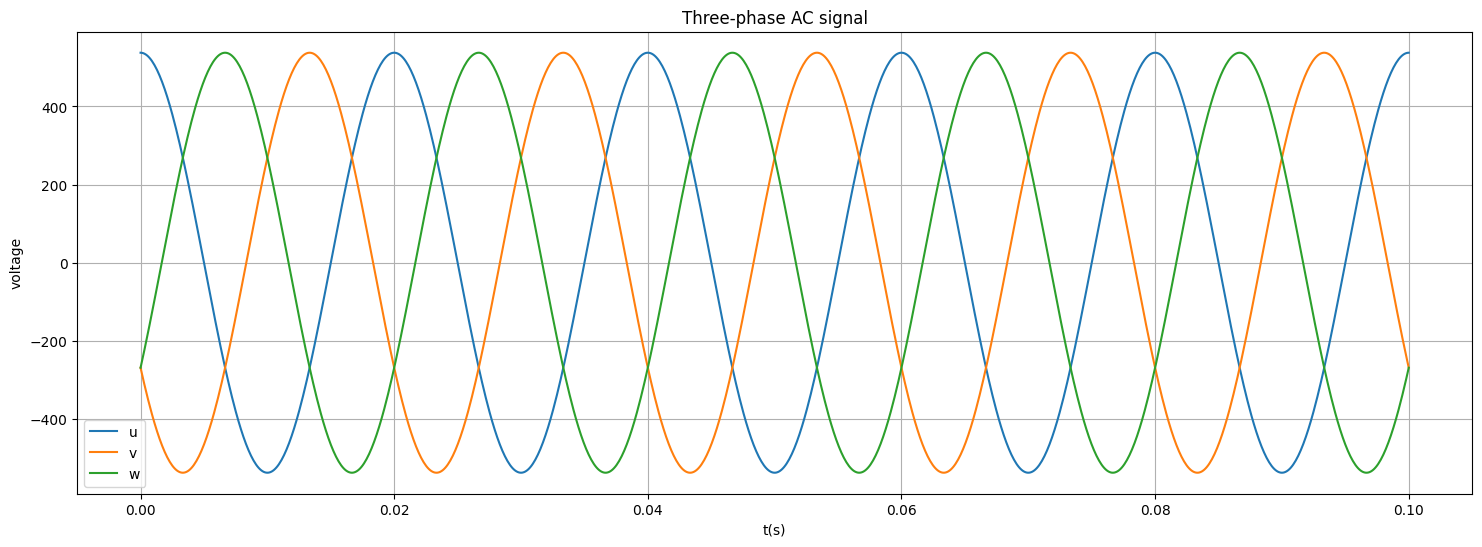

In [9]:
# VFD-AC2DC

import numpy as np
import matplotlib.pyplot as plt

# 三相交流电信号
t = np.linspace(0, 0.1, 1000)  # 时间序列
f = 50  # 频率
w = 2 * np.pi * f  # 角频率
A = 380 * np.sqrt(2)  # 幅值
u = A * np.cos(w * t)  
v = A * np.cos(w * t + 2 * np.pi / 3)
w = A * np.cos(w * t + 4 * np.pi / 3)

# plot u, v, w
plt.figure(figsize=(18, 6))
plt.plot(t, u, label='u')
plt.plot(t, v, label='v')
plt.plot(t, w, label='w')
plt.legend()
plt.xlabel('t(s)')
plt.ylabel('voltage')
plt.title('Three-phase AC signal')
plt.grid()
plt.show()

## 单相整流桥

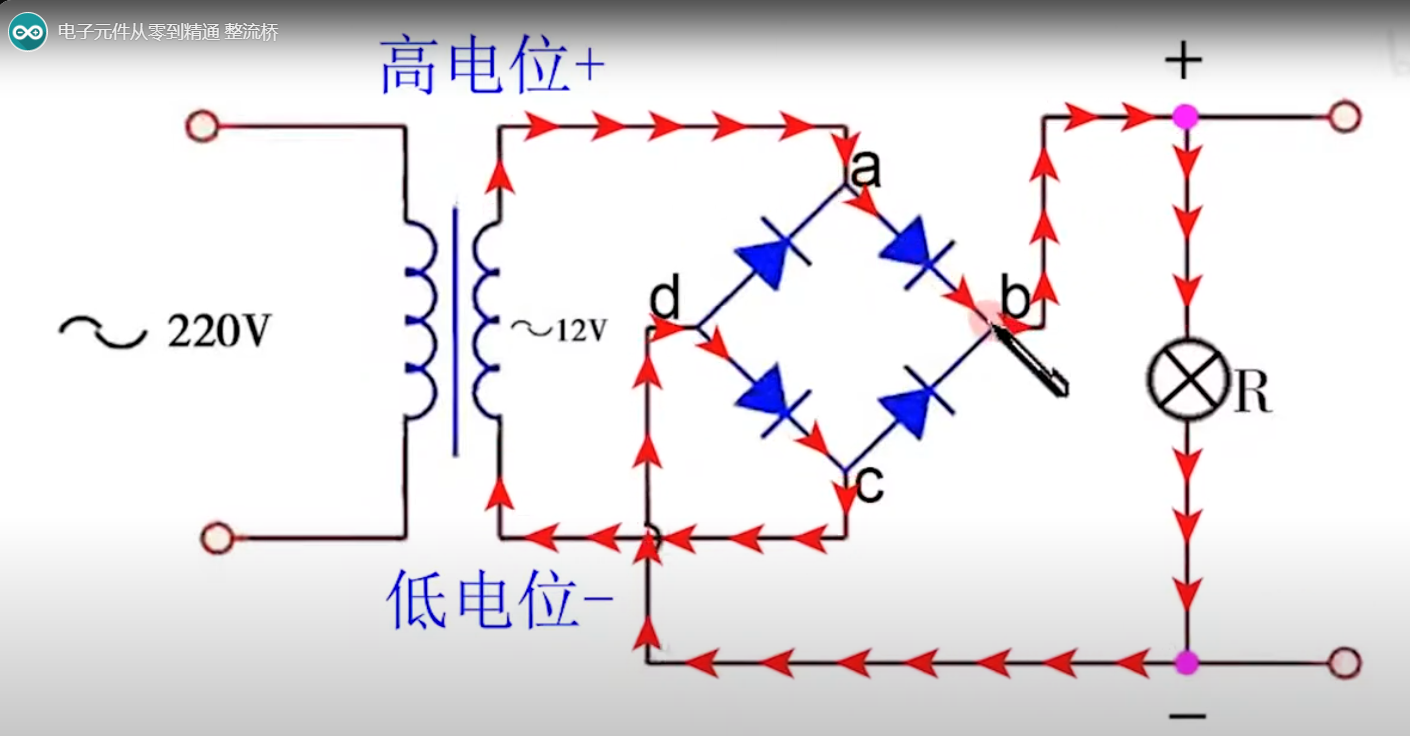

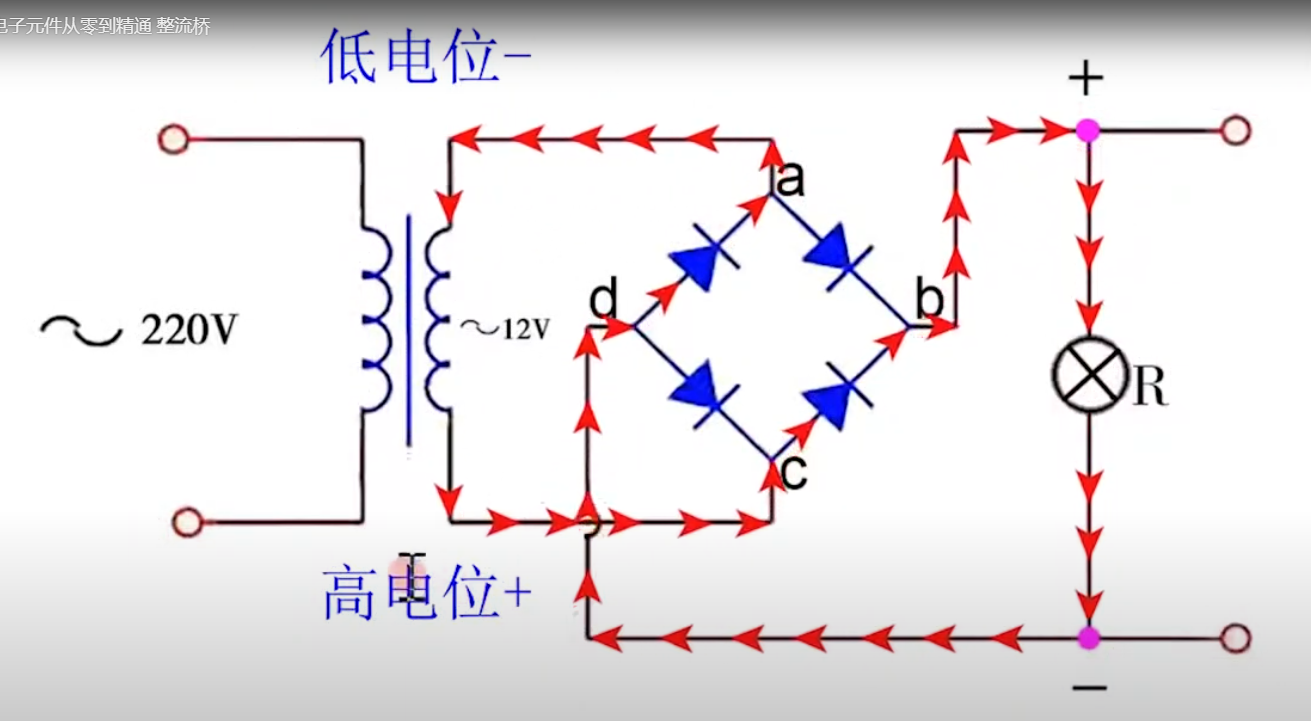

## 三相整流

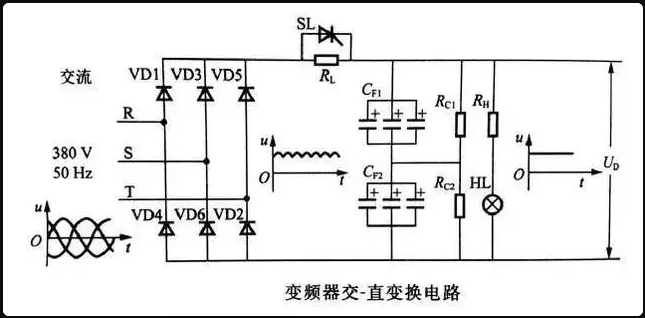

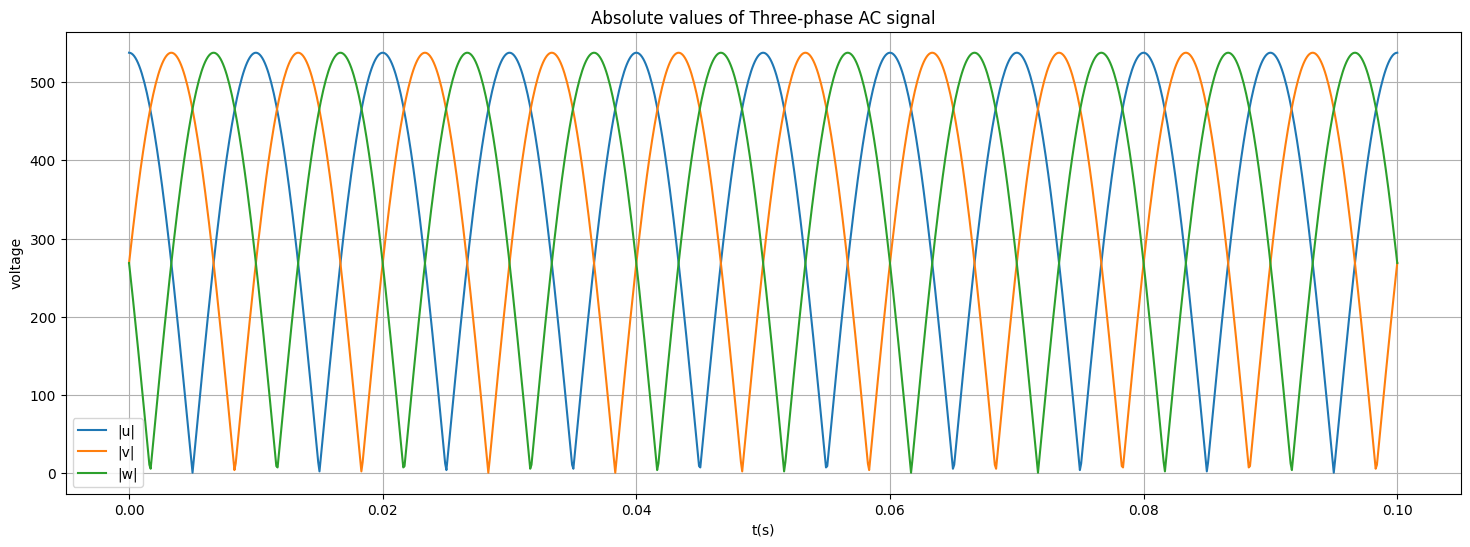

In [10]:
# Apply np.abs() to u, v, and w
u_abs = np.abs(u)
v_abs = np.abs(v)
w_abs = np.abs(w)

# Plot the absolute values of u, v, and w
plt.figure(figsize=(18, 6))
plt.plot(t, u_abs, label='|u|')
plt.plot(t, v_abs, label='|v|')
plt.plot(t, w_abs, label='|w|')
plt.legend()
plt.xlabel('t(s)')
plt.ylabel('voltage')
plt.title('Absolute values of Three-phase AC signal')
plt.grid()
plt.show()

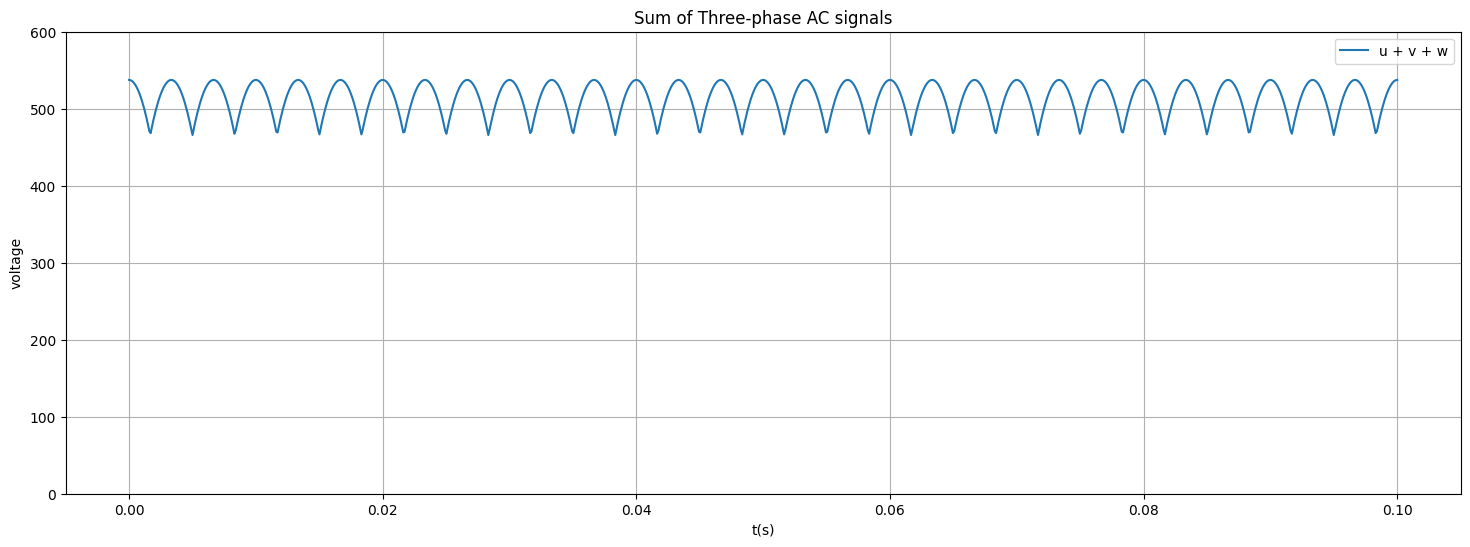

In [13]:
uvw_max = np.maximum(np.maximum(u_abs, v_abs), w_abs)

# Plot the sum of u, v, and w
plt.figure(figsize=(18, 6))
plt.plot(t, uvw_max, label='u + v + w')
plt.legend()
plt.xlabel('t(s)')
plt.ylabel('voltage')
plt.title('Sum of Three-phase AC signals')
plt.ylim(0, 600)
plt.grid()
plt.show()

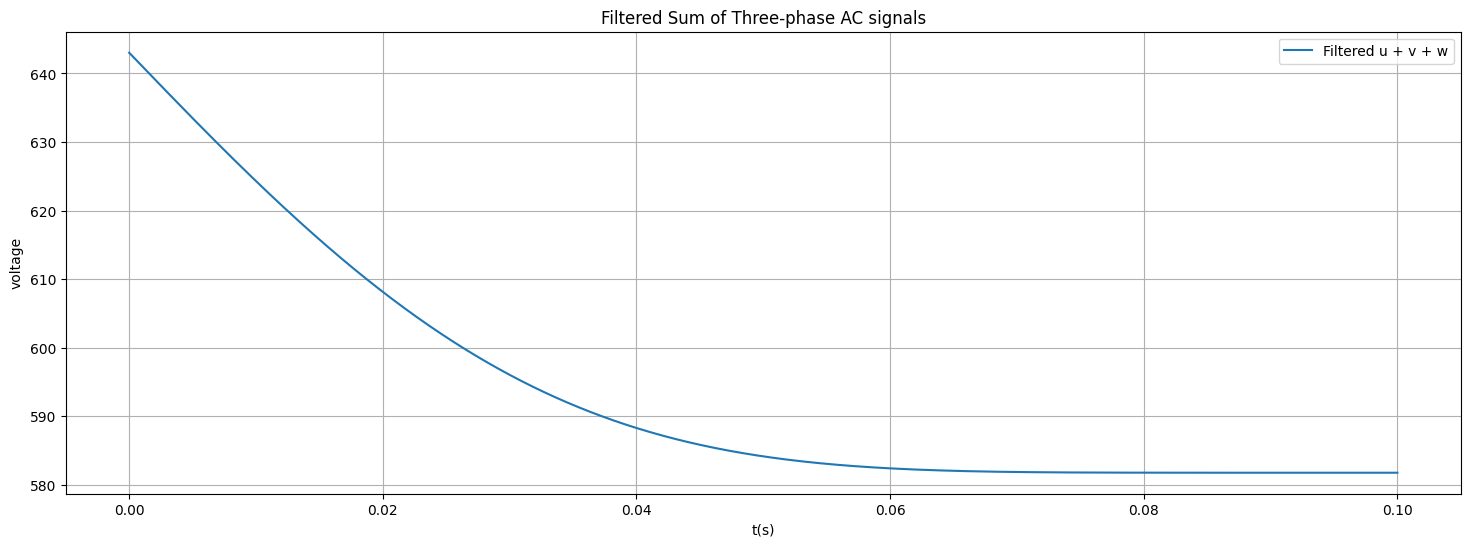

In [12]:
from scipy.signal import butter, filtfilt

# Define a low pass filter
def low_pass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Apply the low pass filter to uvw_sum
cutoff_frequency = 10  # Cutoff frequency in Hz
sampling_rate = 1 / (t[1] - t[0])  # Sampling rate in Hz
filtered_uvw_sum = low_pass_filter(uvw_sum, cutoff_frequency, sampling_rate)

# Plot the filtered uvw_sum
plt.figure(figsize=(18, 6))
plt.plot(t, filtered_uvw_sum, label='Filtered u + v + w')
plt.legend()
plt.xlabel('t(s)')
plt.ylabel('voltage')
plt.title('Filtered Sum of Three-phase AC signals')
plt.grid()
plt.show()